In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [7]:
def construct_numvec(digit, latent_dim=10, classes=10, z = None):
    """
        digit: int -> the class of the kuzushiji character to be generated
        latent_dim: int -> the number of dimensions in the latent space: equal to the number of classes
        classes: int -> the number of class labels for a given model (10 for KMNIST, 49 for K49)
        z: list -> the z-vector indicating the position in latent space to sample an character
    """
    
    out = np.zeros((1, latent_dim + classes))
    out[:, digit + latent_dim] = 1.
    if z is None:
        return(out)
    else:
        for i in range(len(z)):
            out[:,i] = z[i]
        return(out)

In [19]:
def generate_images(digit=0, rows=10, cols=10, max_z=1.5, decoder=0, save_fig=False):
    """
        digit: int -> the class of the kuzushiji character to be generated
        rows: int -> the width of the latent space
        cols: int -> the height of the latent space
        max_z: float ->
        decoder: int -> the generator to be used to create augmented data (0 for K49, 1 for KMNIST)
        save_fig: boolean -> determines if an image of the augmented data should be created
    """
    
    images = []
    
    if decoder:
        decoder = keras.models.load_model("decoder-KMNIST")
        latent_dim = 10
        classes = 10
    else:
        decoder = keras.models.load_model("decoder-K49")
        latent_dim = 49
        classes = 49

    fig, axs = plt.subplots(rows, cols)
    fig.set_figwidth(28)
    fig.set_figheight(28)

    for i in range(0, rows):
        z1 = (((i / (rows-1)) * max_z)*2) - max_z
        for j in range(0, cols):
            z2 = (((j / (cols-1)) * max_z)*2) - max_z
            z_ = [z1, z2]
            vec = construct_numvec(digit, 10, 10, z_)
            decoded = decoder.predict(vec)
            images.append(decoded.reshape(28,28))
            axs[i, j].imshow(decoded.reshape(28,28), cmap=plt.cm.gray)
            axs[i, j].axis('off')
    
    if save_fig:
        fig.savefig("image_%d_%d_%d.png" % (digit, rows, cols))
        
    return np.array(images)

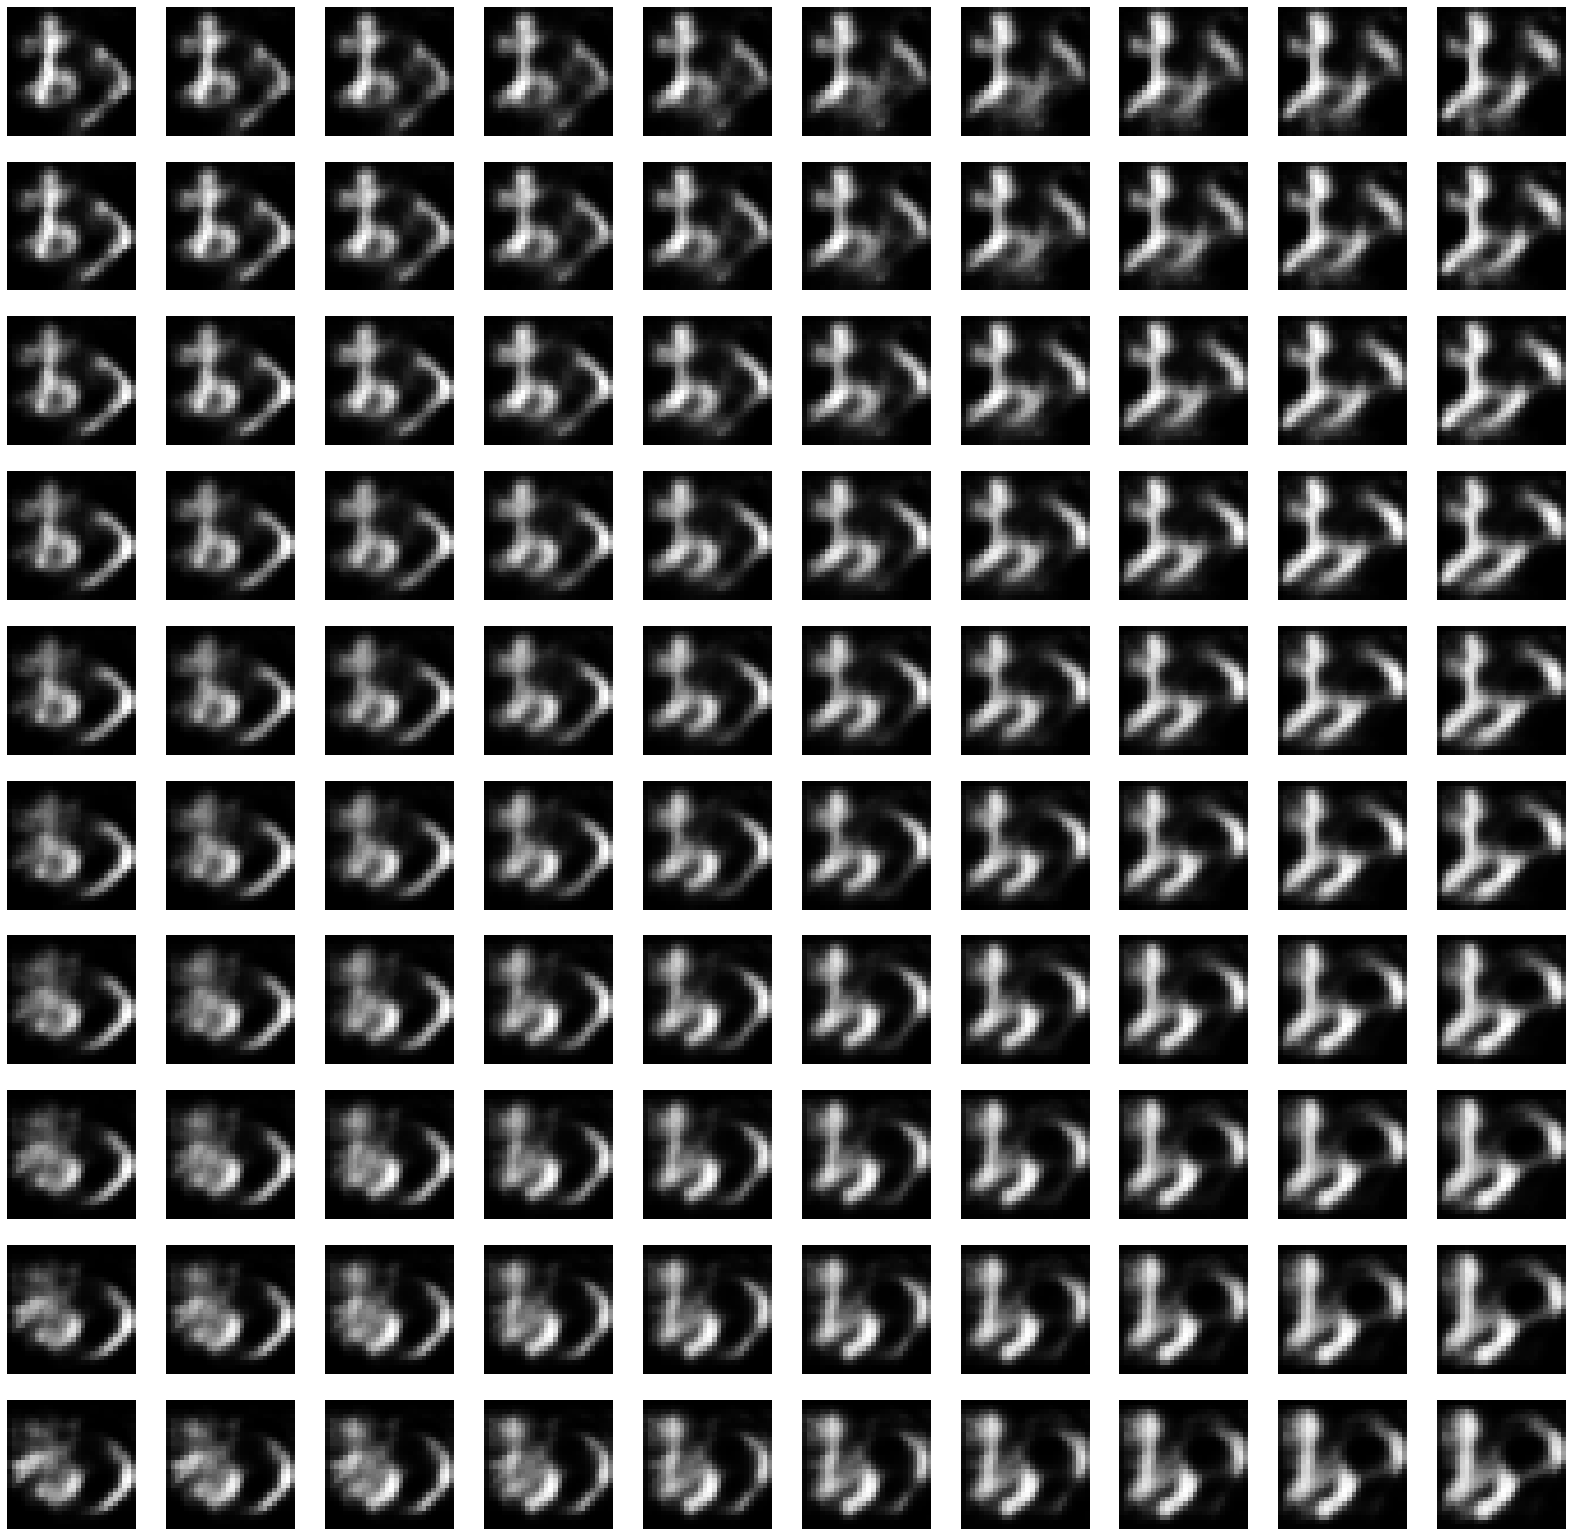

In [20]:
aug_data = generate_images(digit=0, rows=10, cols=10, max_z=1.5, decoder=1, save_fig=True)

In [21]:
aug_data.shape

(100, 28, 28)

In [25]:
def generate_aug_kmnist():
    images = generate_images(digit=0, rows=10, cols=10, max_z=1.5, decoder=1)
    for digit in range(1,10):
        aug_data = generate_images(digit=digit, rows=10, cols=10, max_z=1.5, decoder=1)
        images = np.concatenate((images, aug_data), axis=0)
        
    return images
    
def generate_aug_k49():
    images = generate_images(digit=0, rows=10, cols=10, max_z=1.5, decoder=0)
    for digit in range(1,49):
        aug_data = generate_images(digit=digit, rows=10, cols=10, max_z=1.5, decoder=0)
        images = np.concatenate((images, aug_data), axis=0)
        
    return images

(1000, 28, 28)

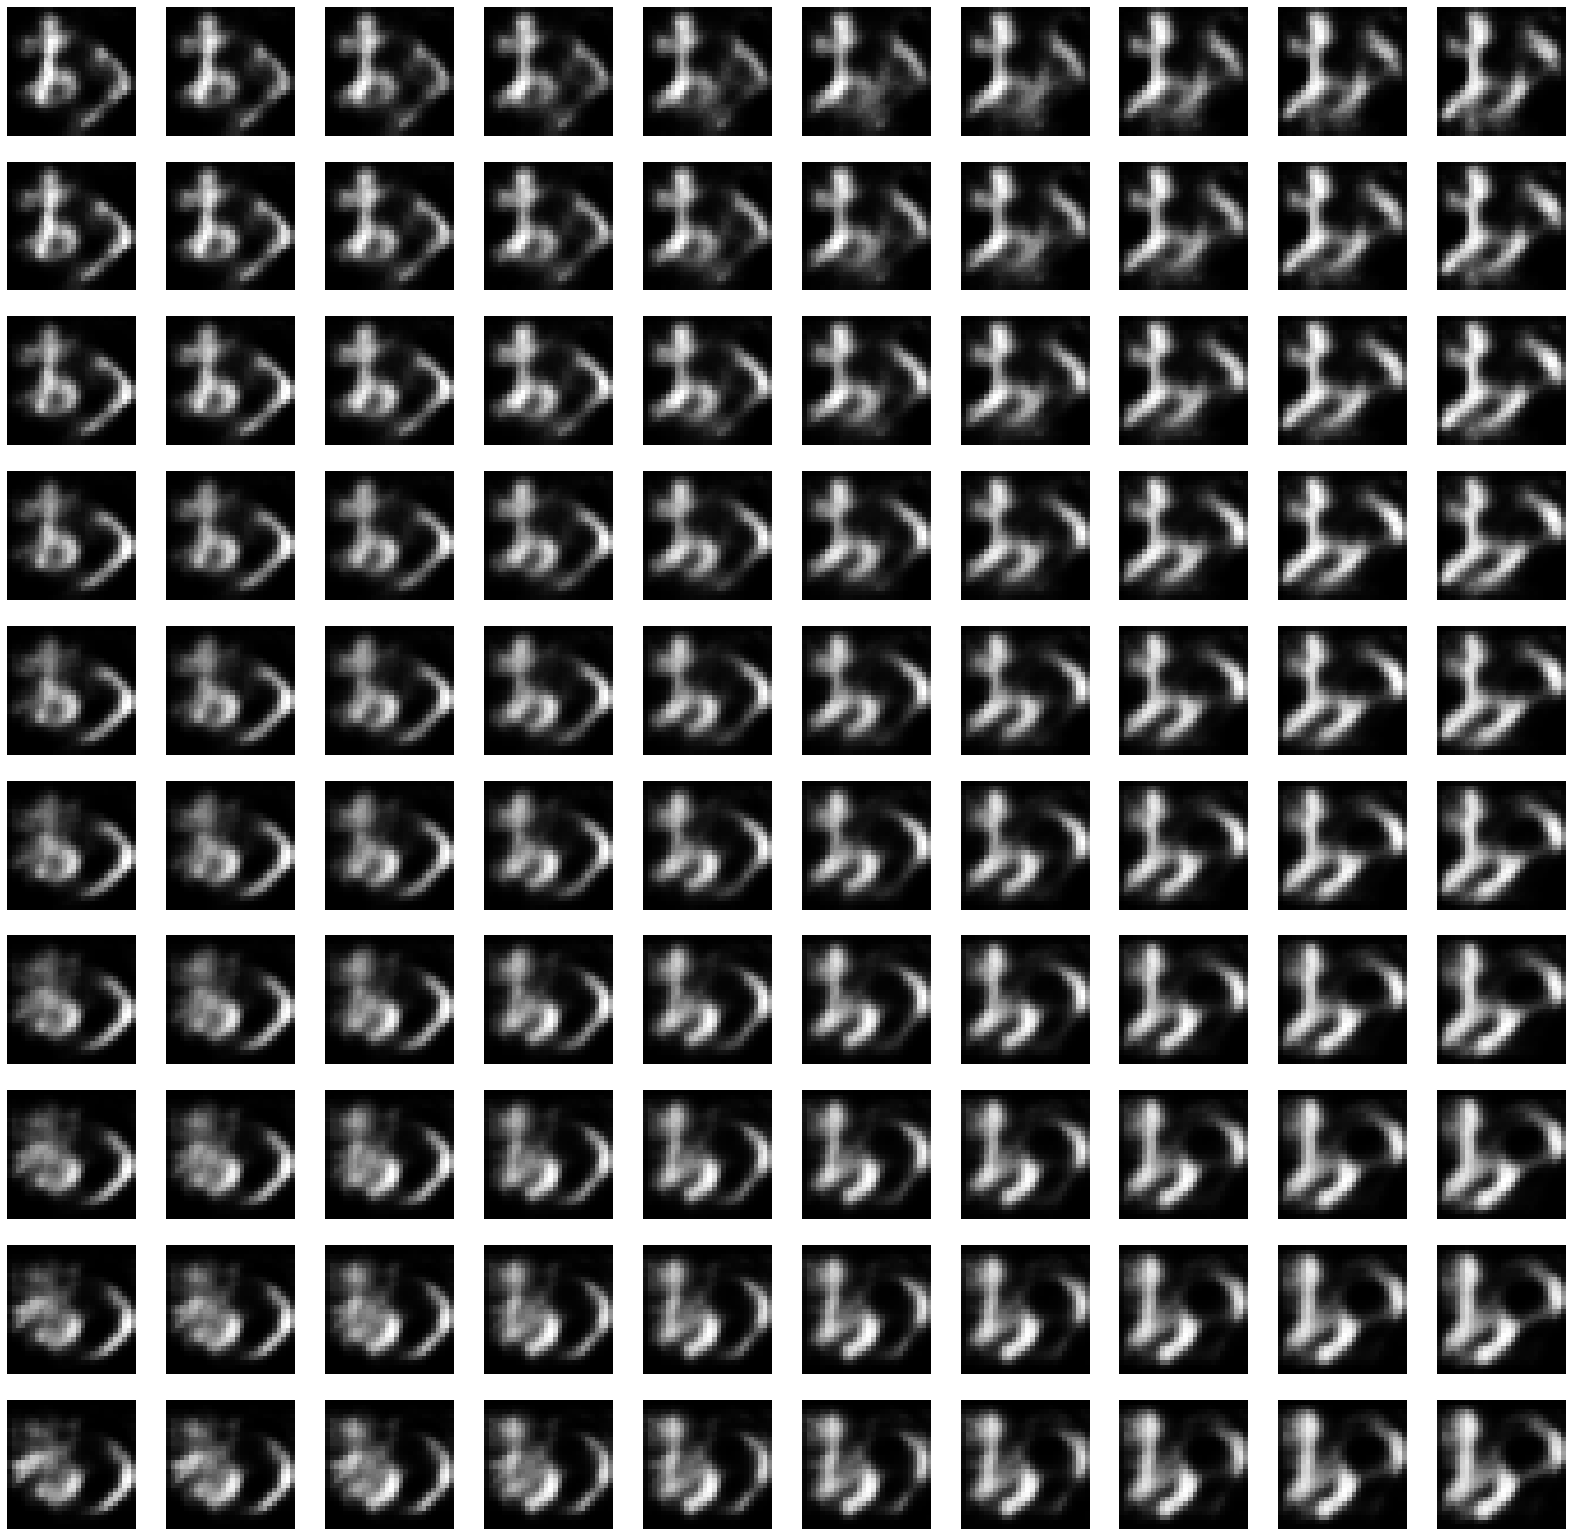

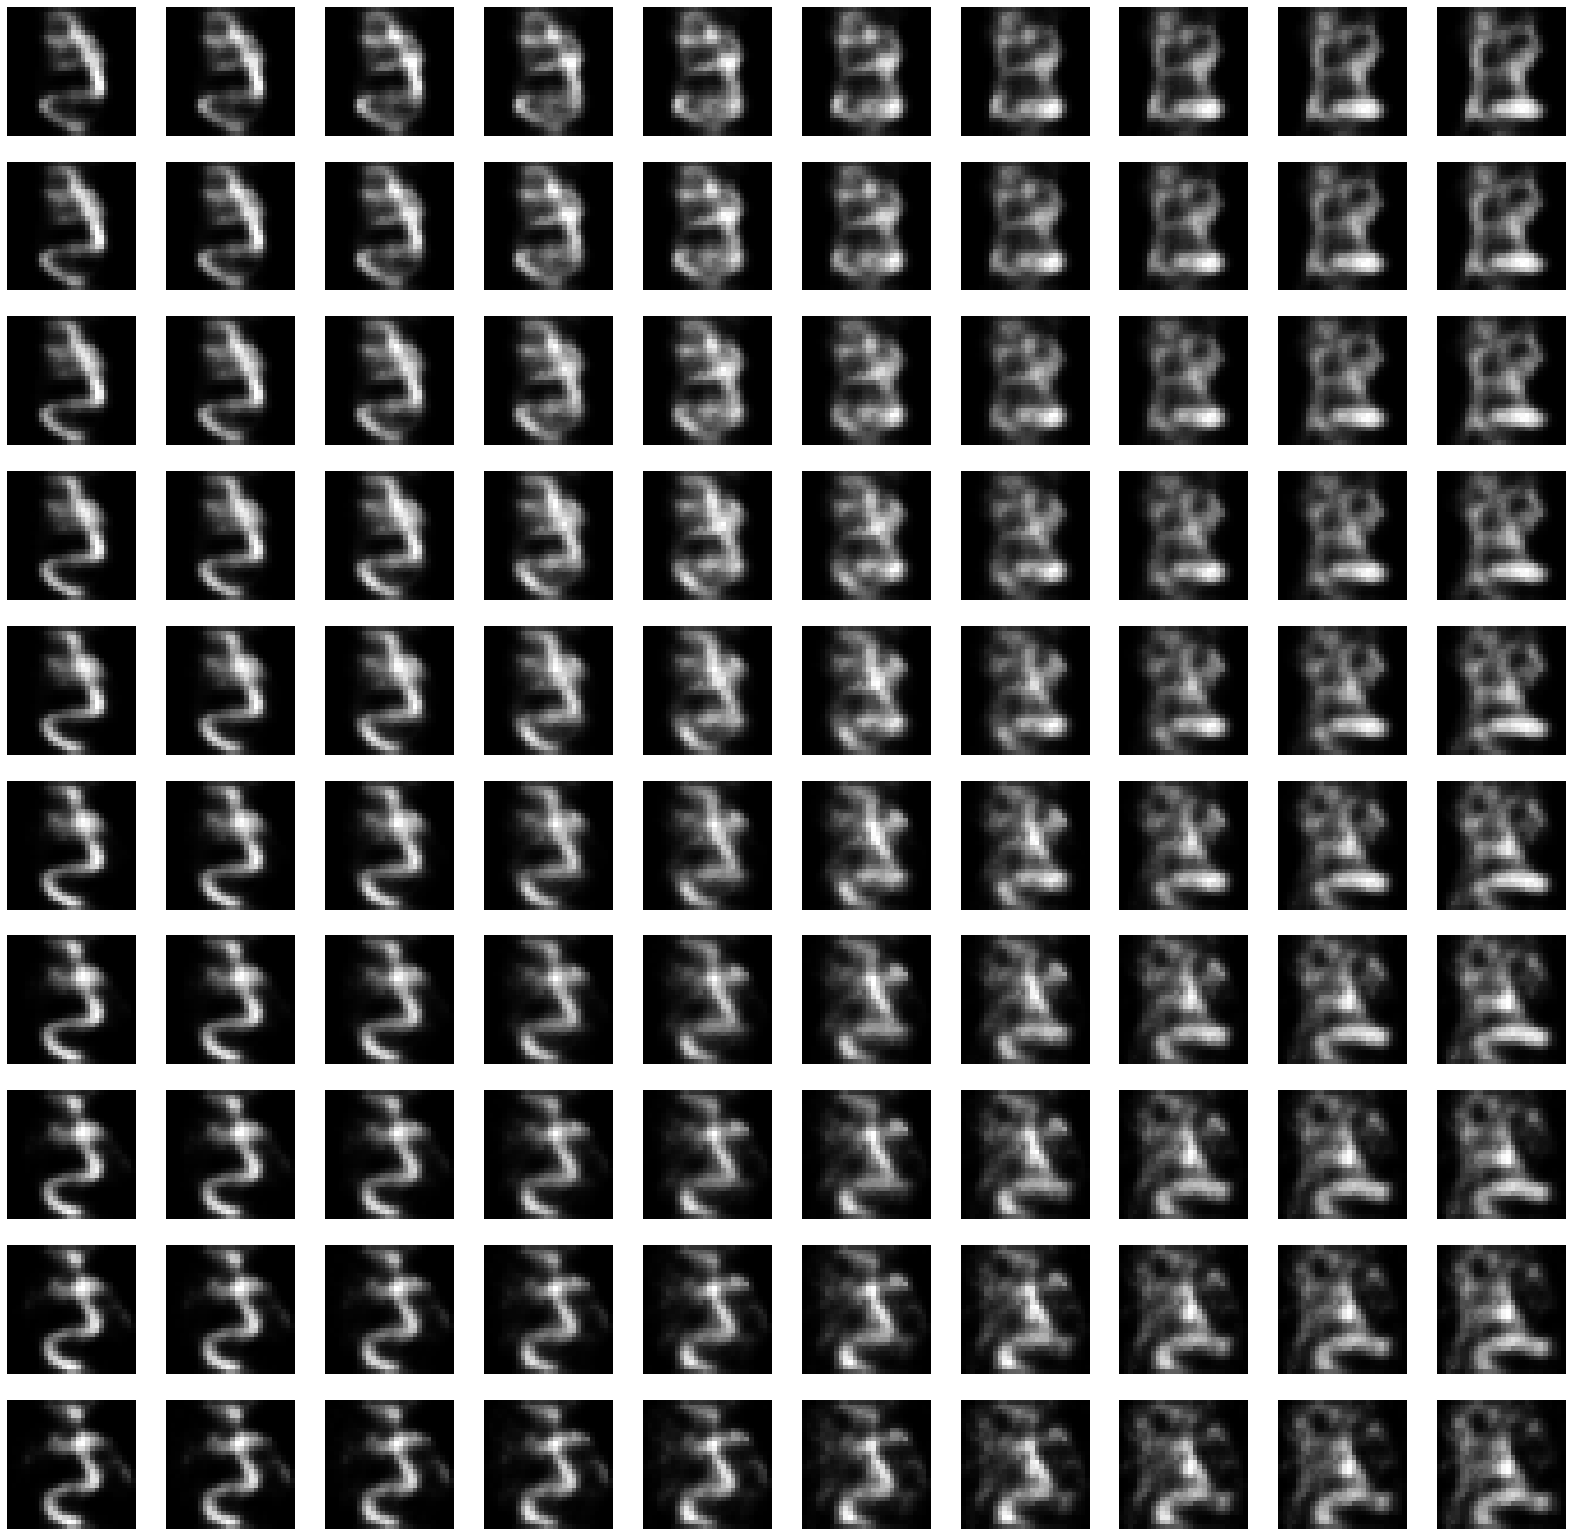

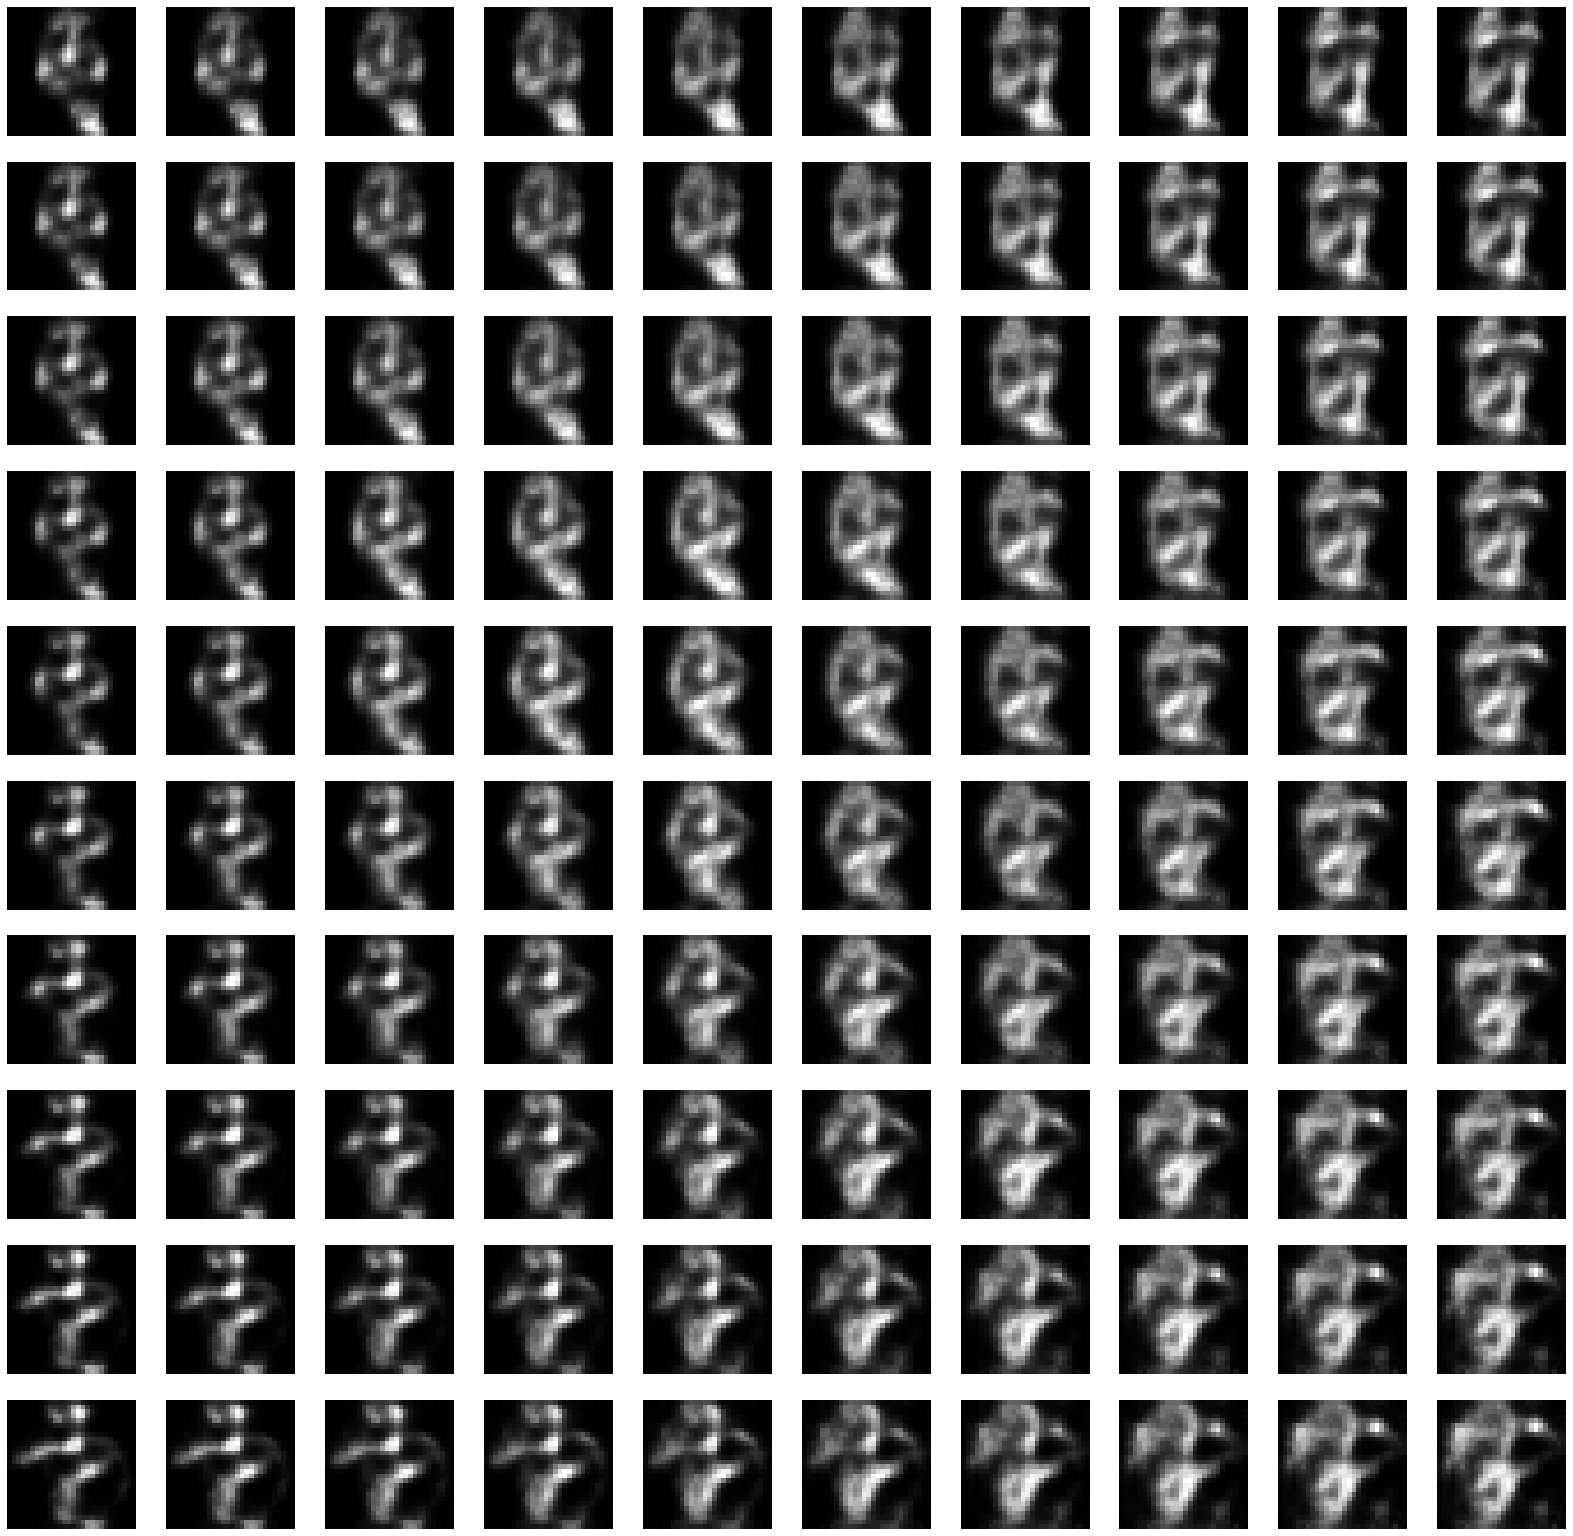

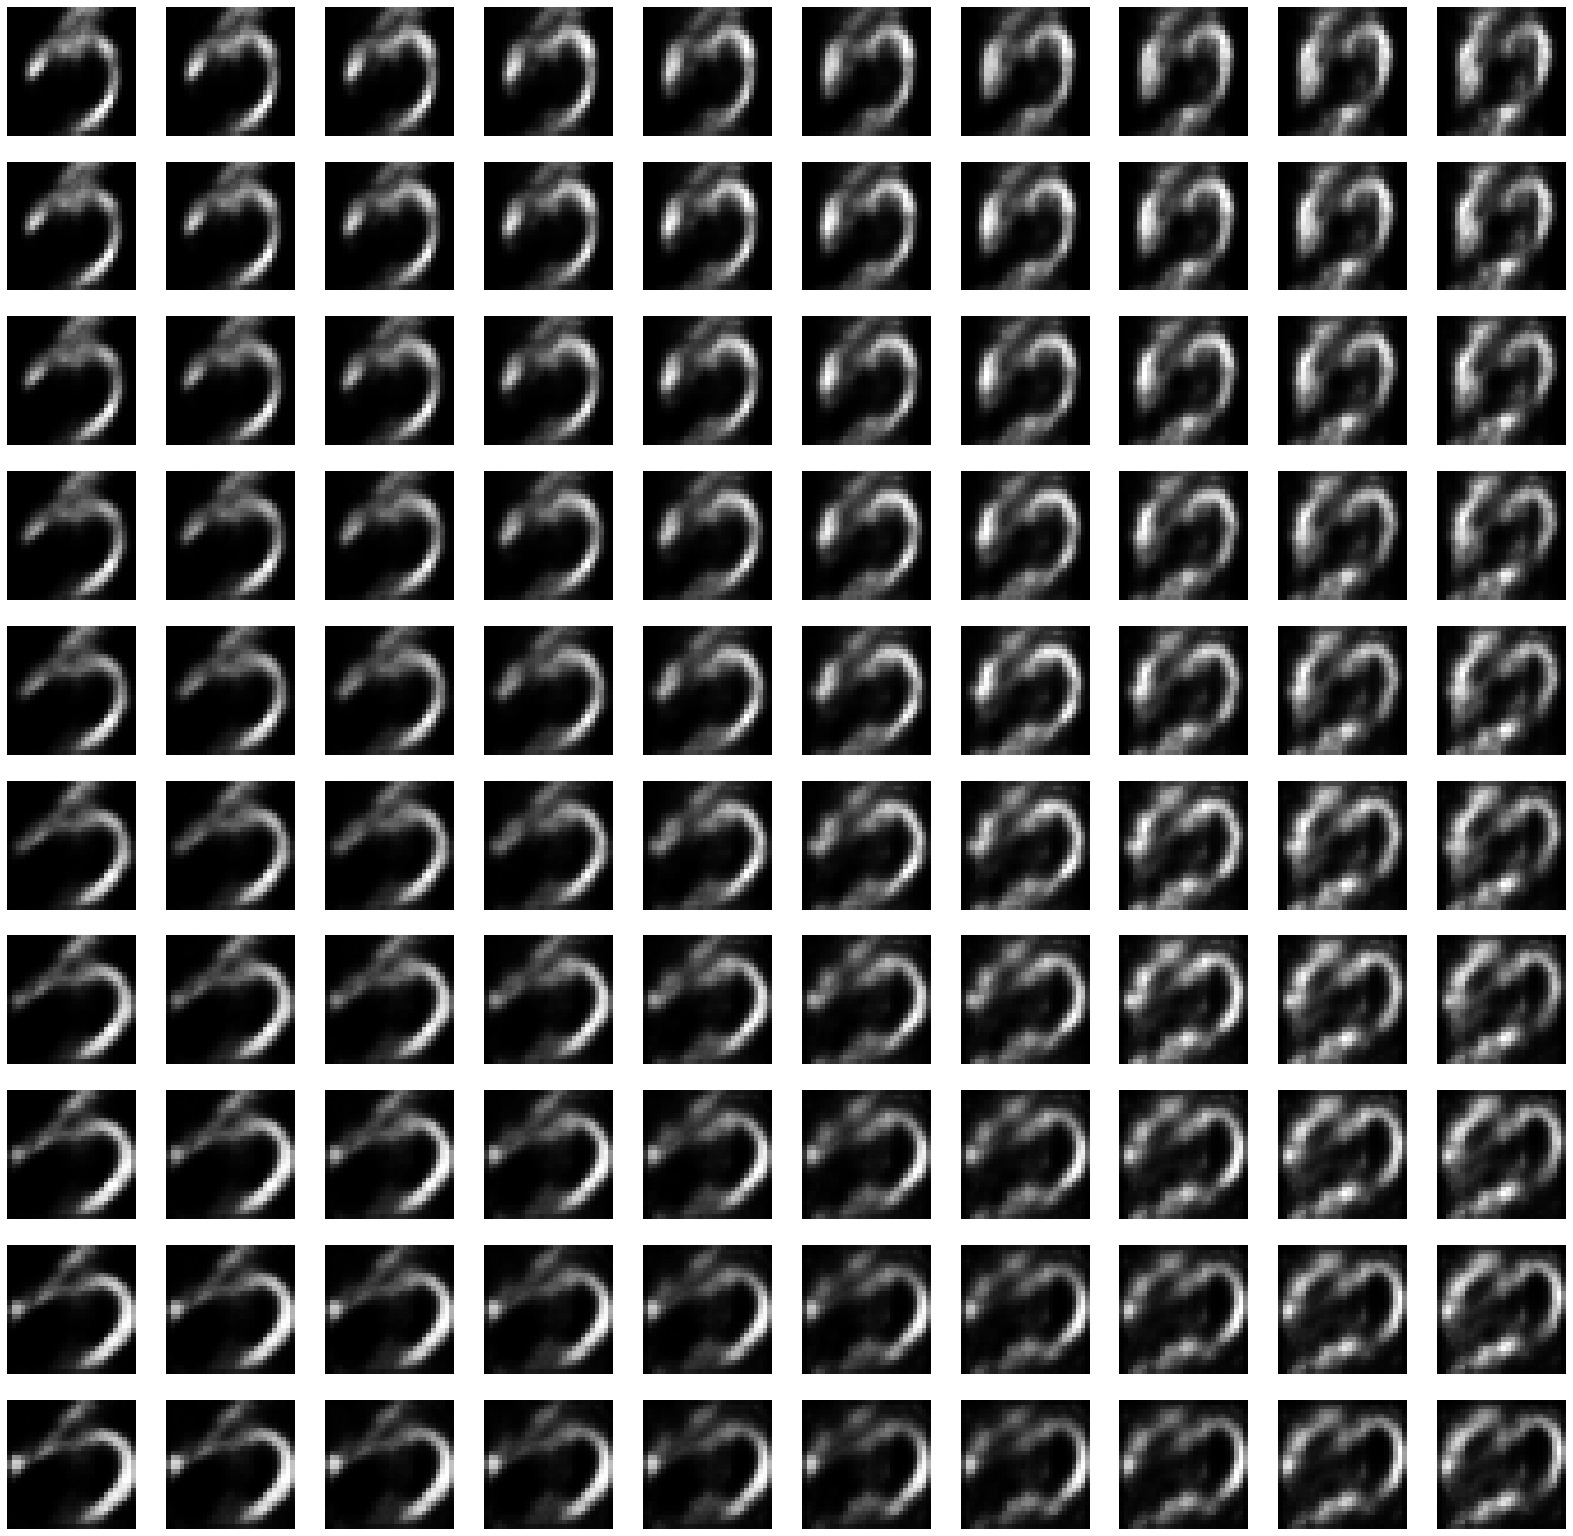

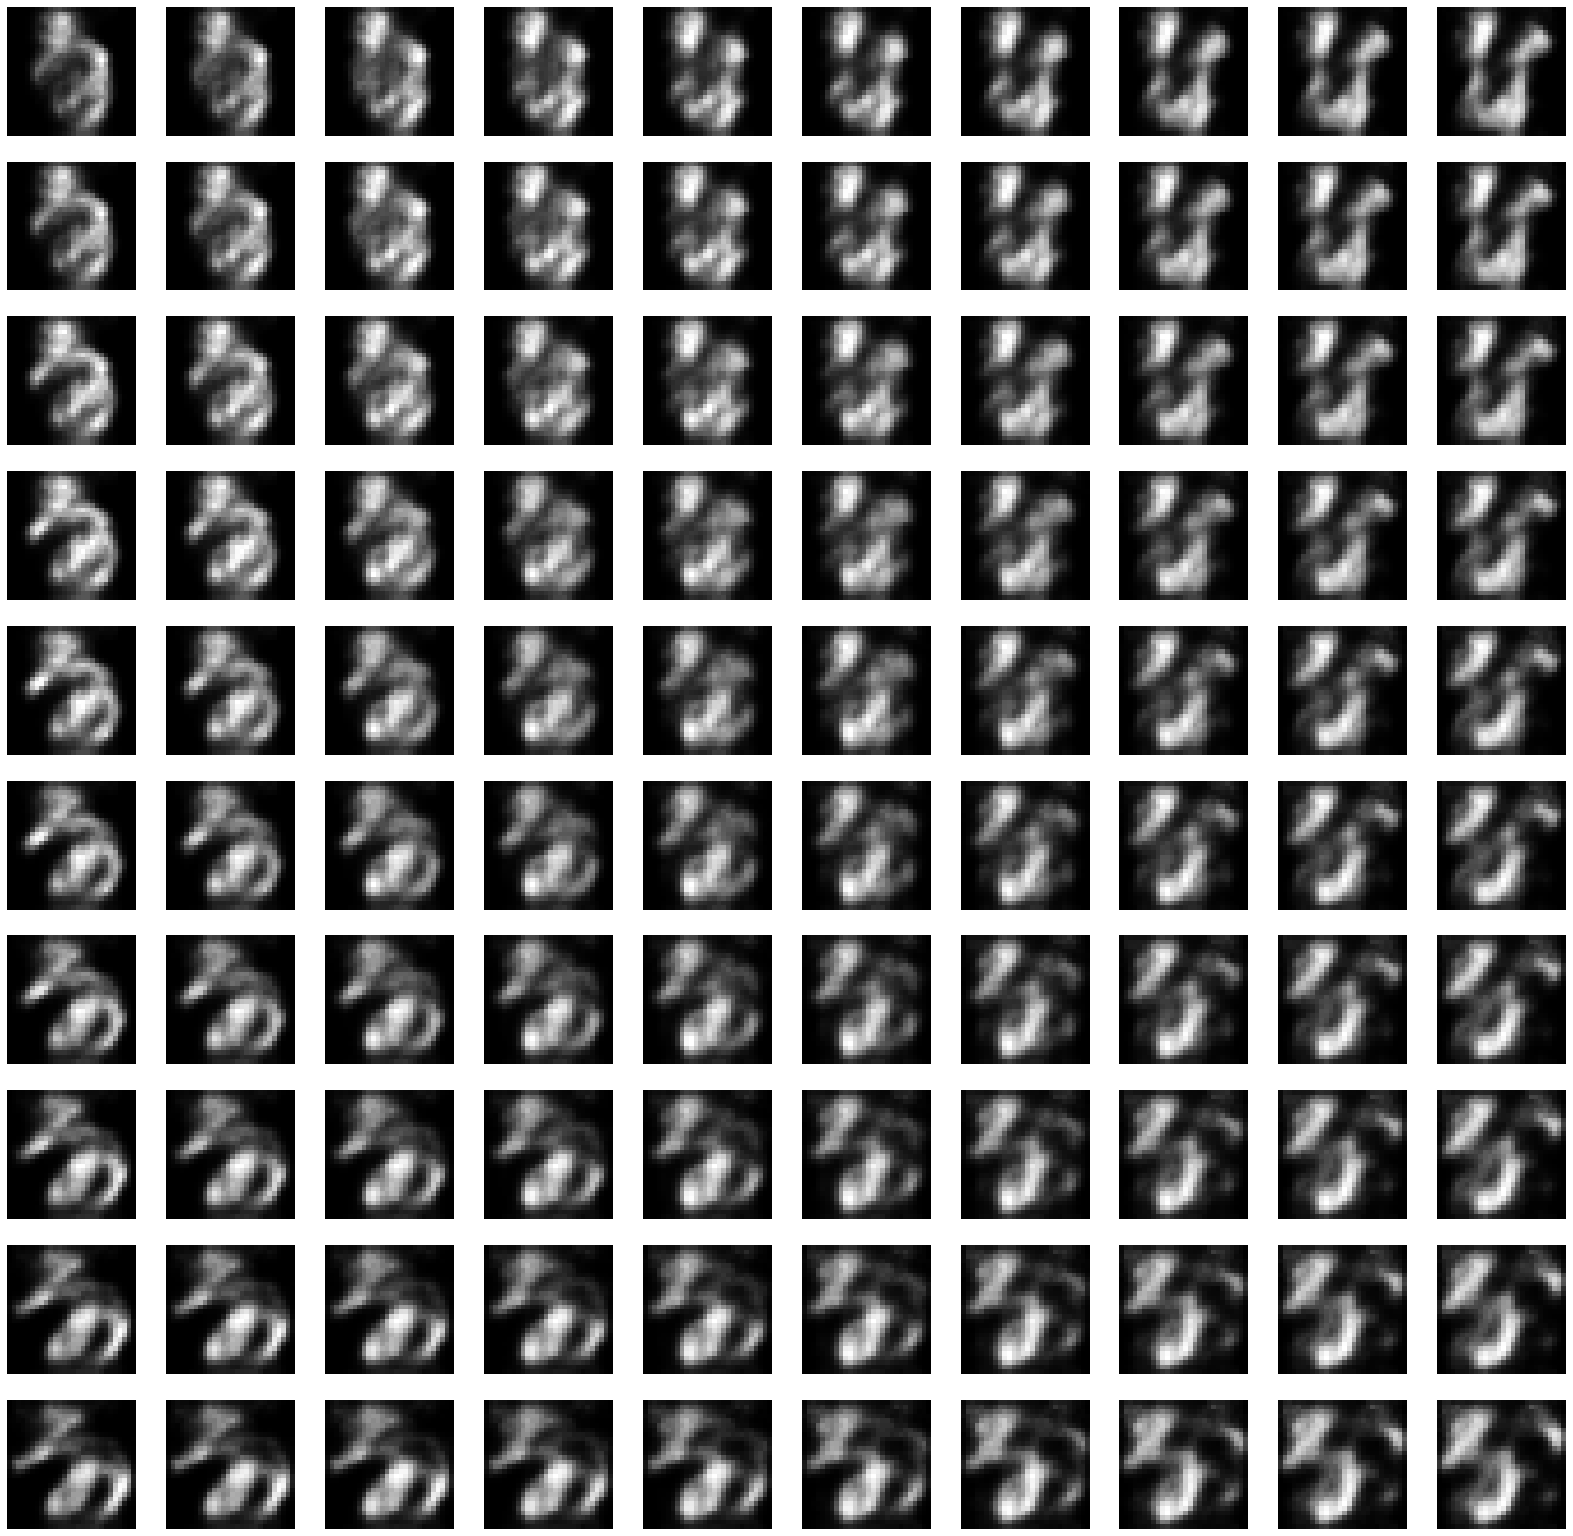

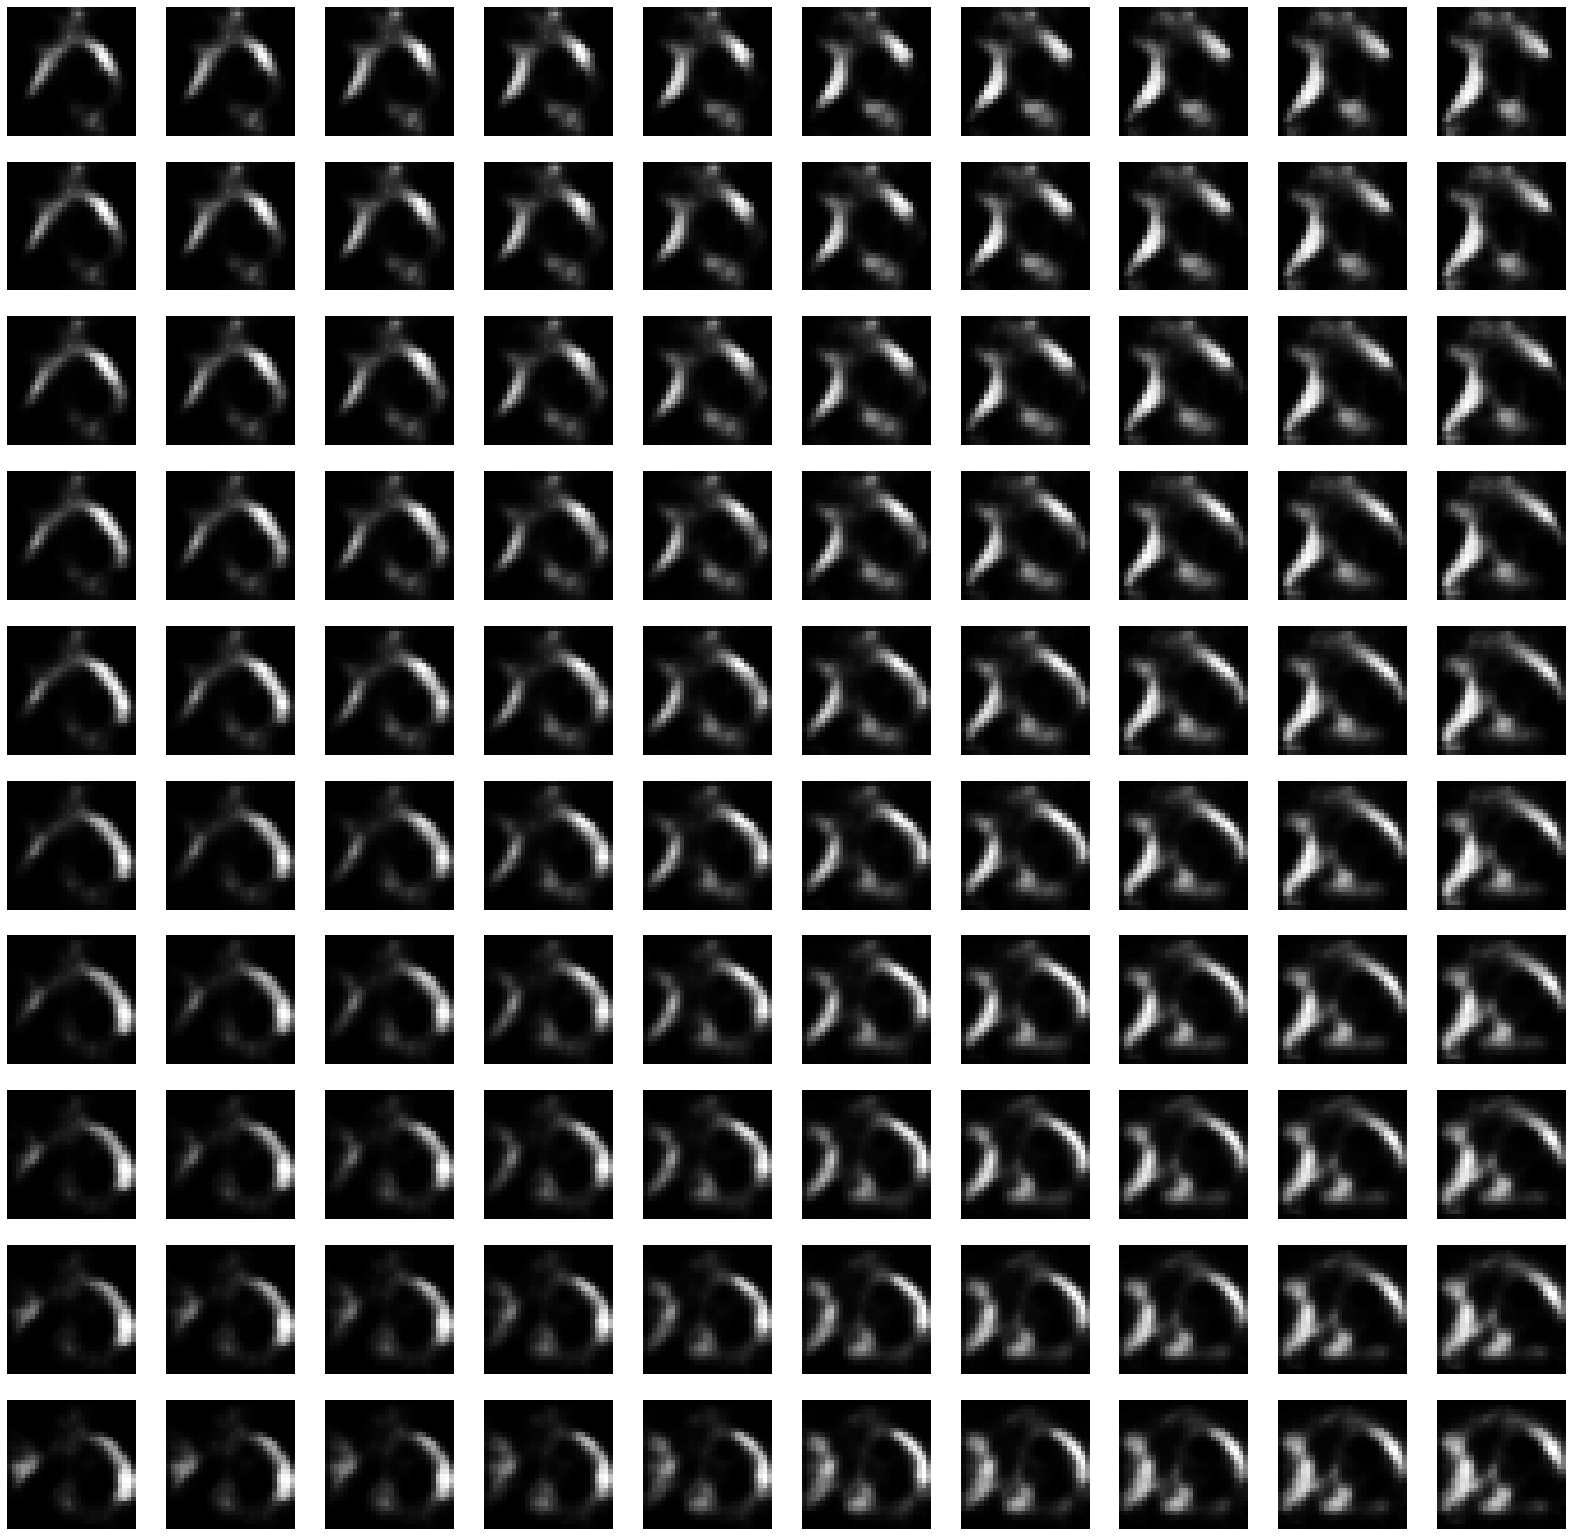

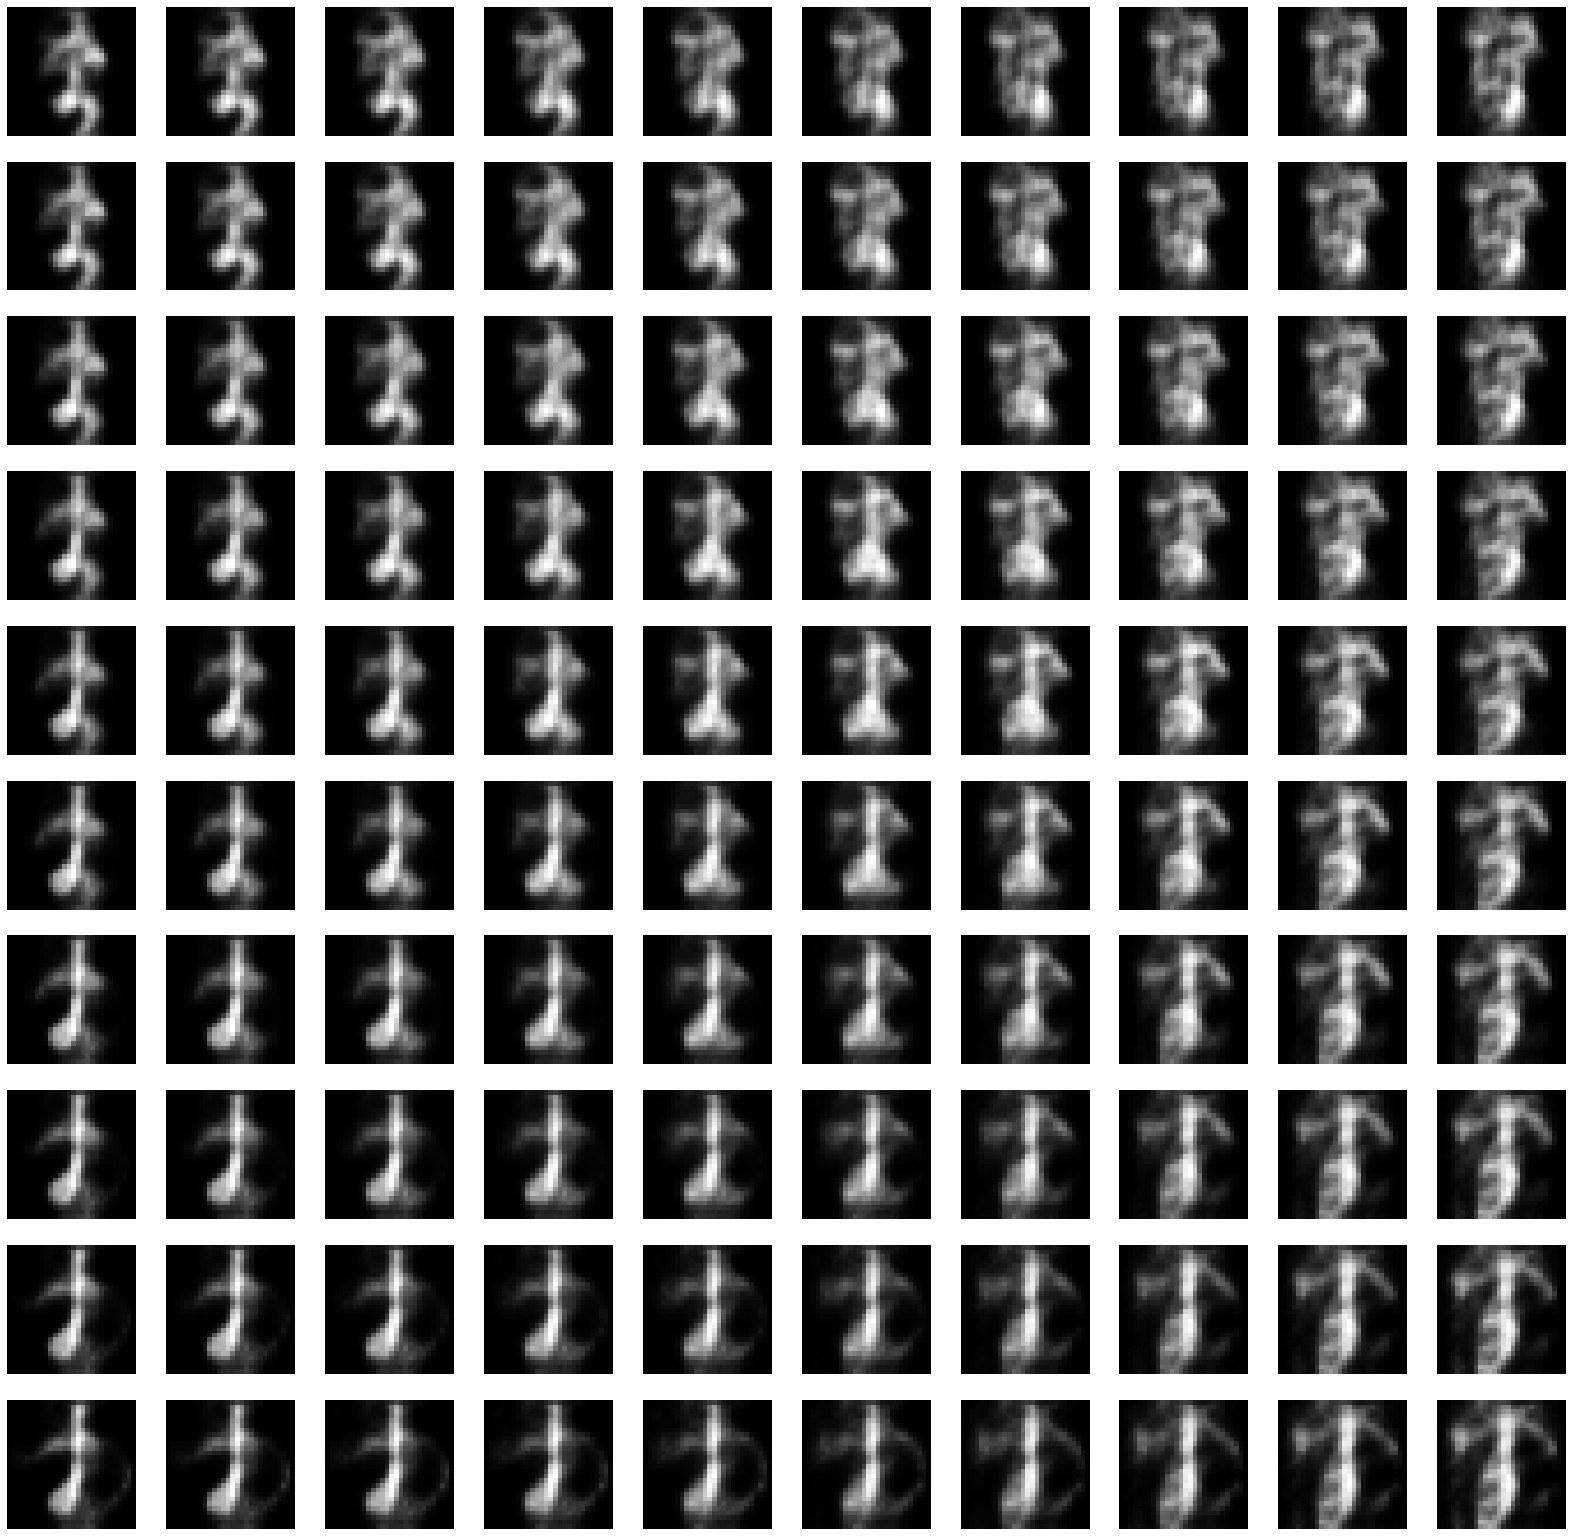

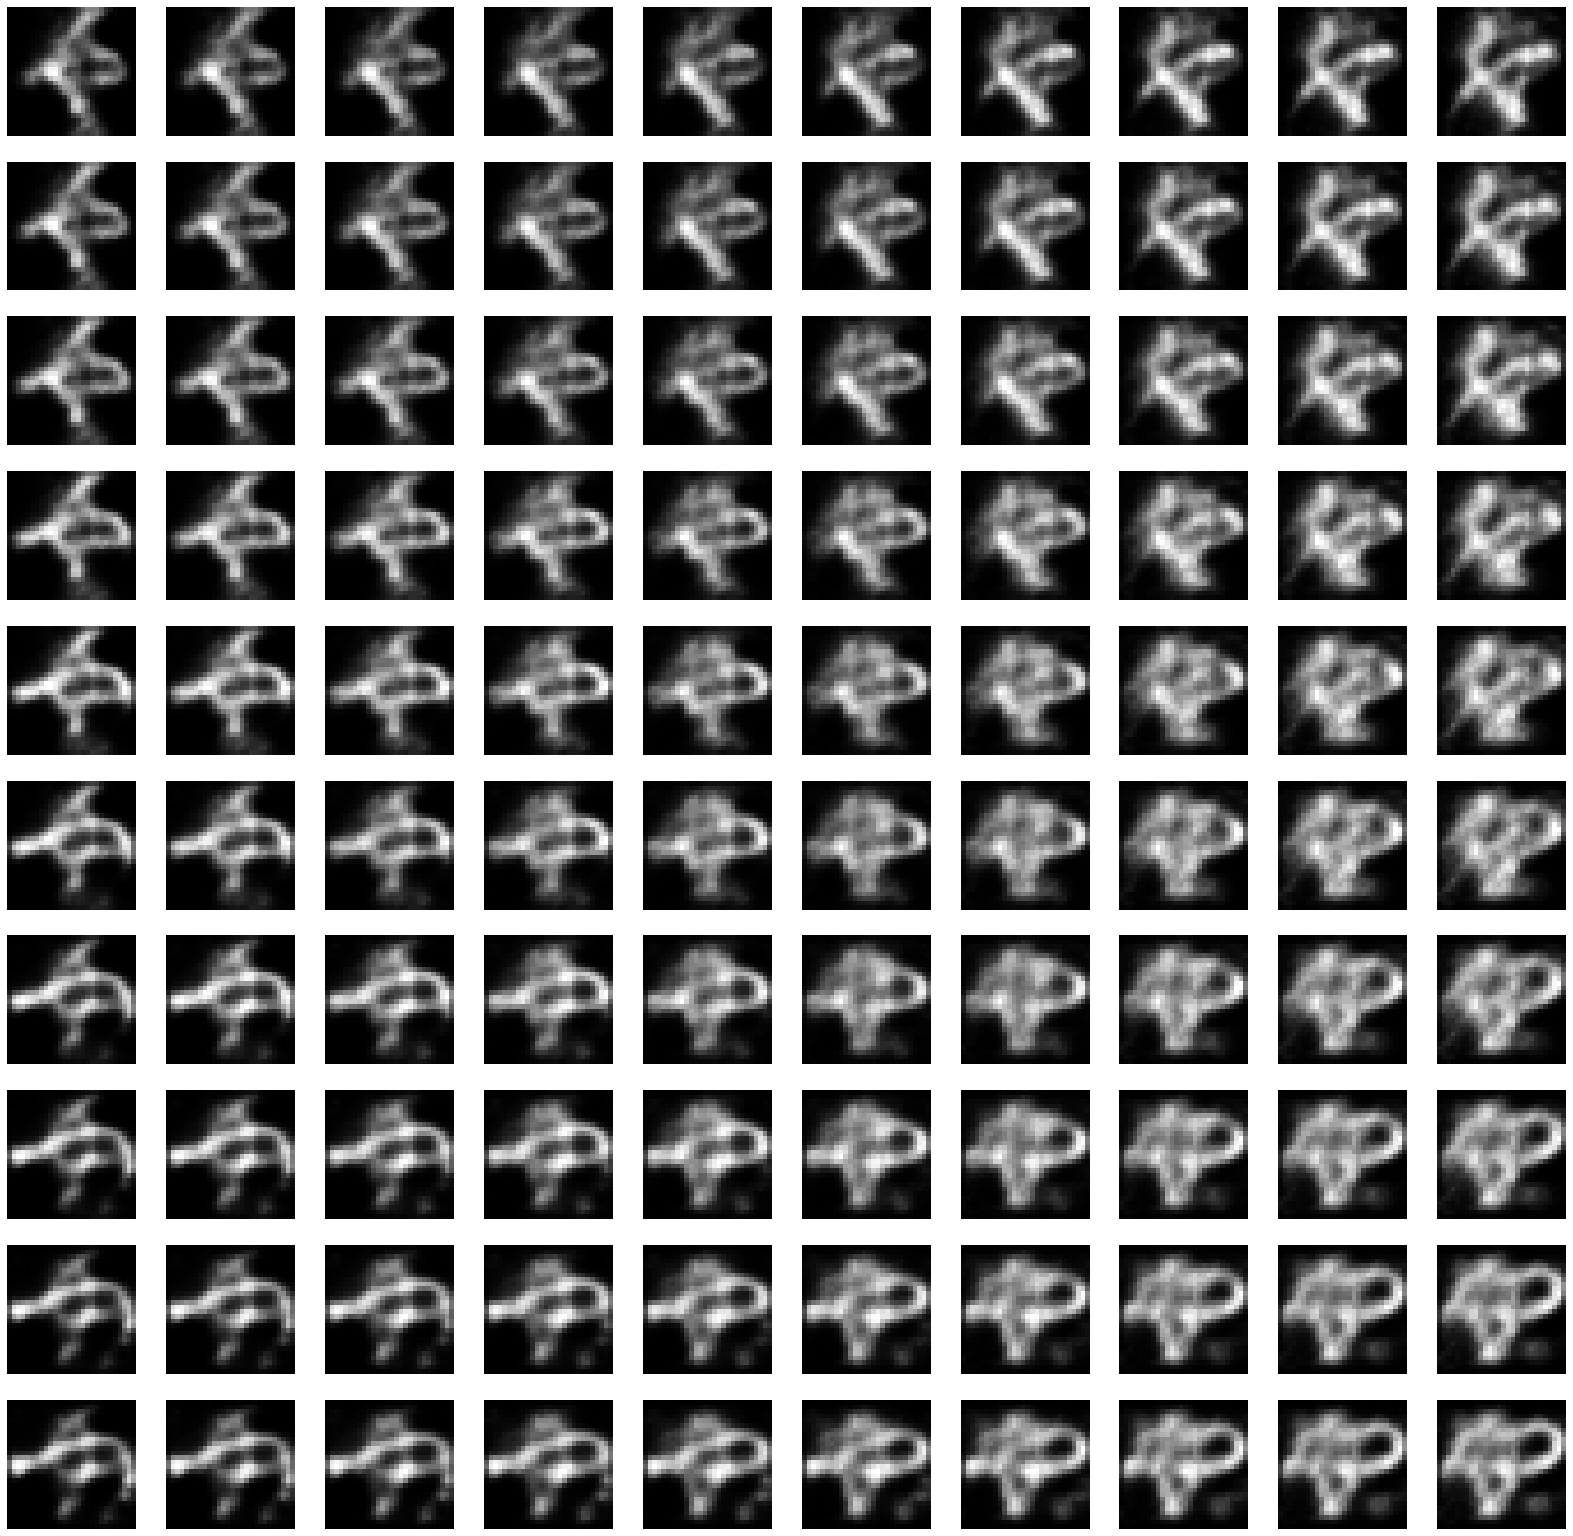

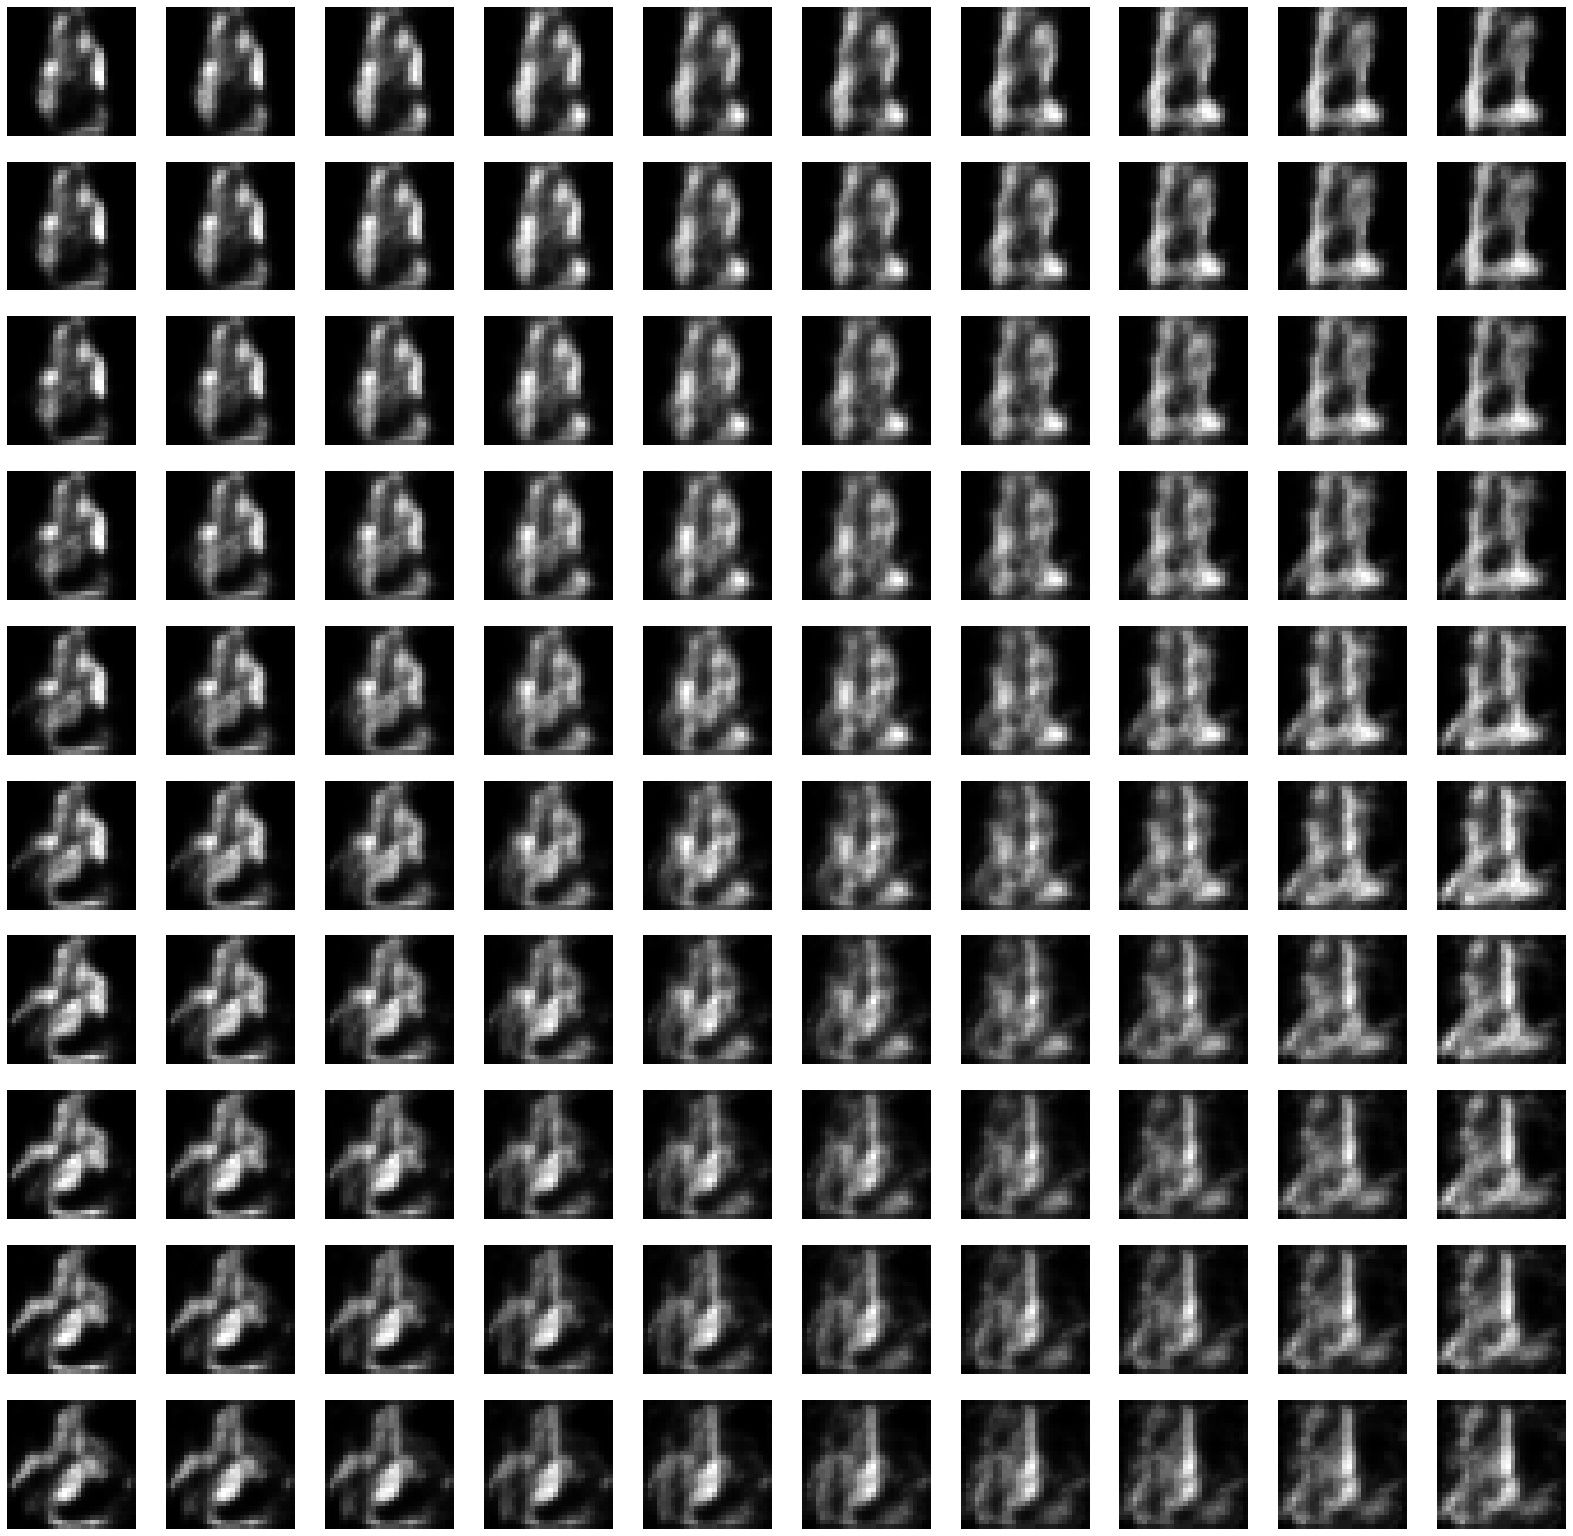

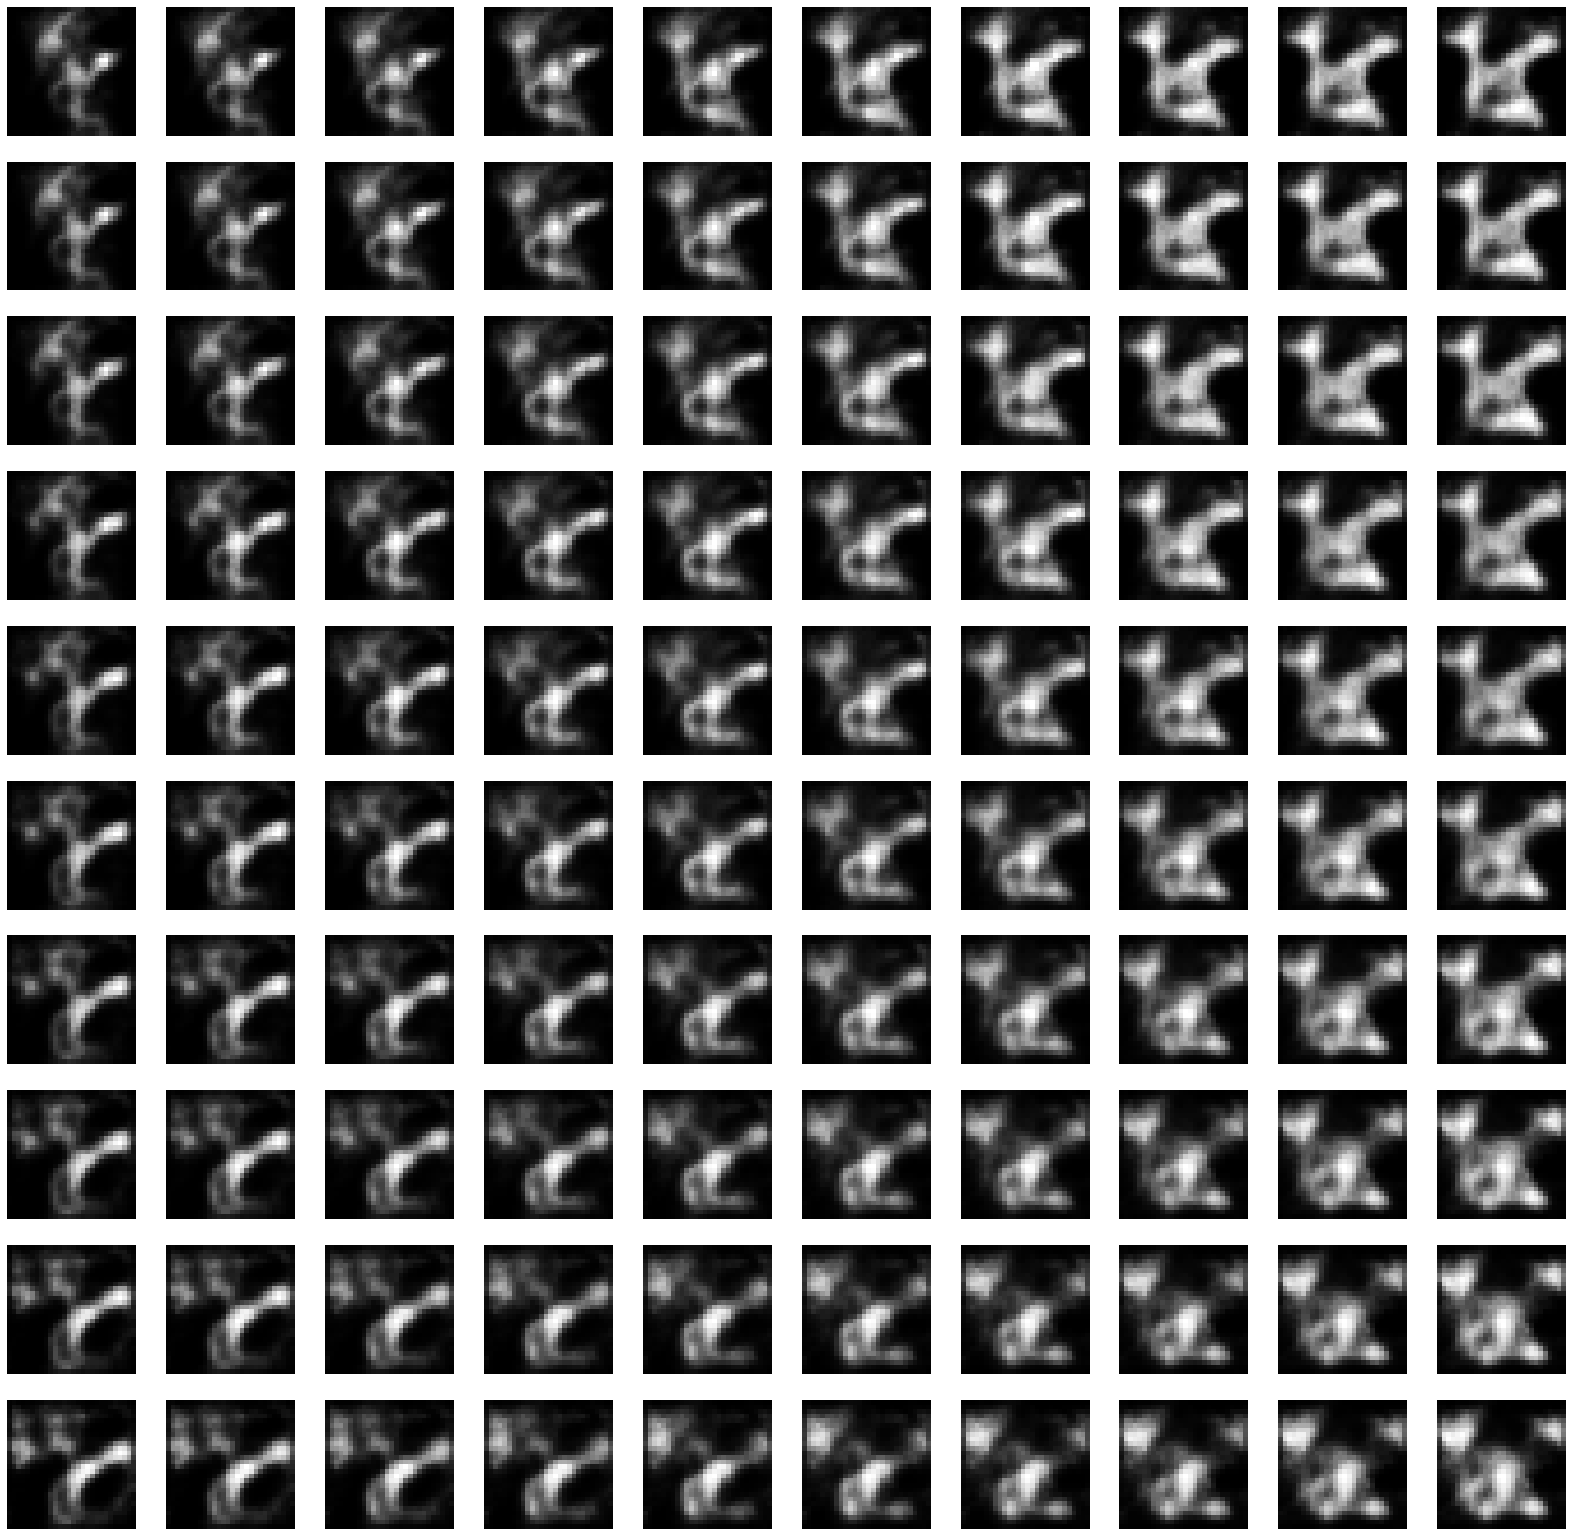

In [26]:
aug_kmnist = generate_aug_kmnist()
aug_kmnist.shape

In [24]:
np.squeeze(aug_kmnist).shape

(10, 100, 28, 28)